In [10]:
library("data.table")
library("qtl")

In [11]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir = "",
                    genfile="./f2_test_window_500_qtl_outfile.csv",
                    phefile = "~/nas/stripes_AIL_gg6a/stripes_2_rqtl/new_subsets/20190827_rqtl_f2_pheno.csv" )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“395 individuals with phenotypes but no genotypes
    35002|35202|35302|35402|35602|35702|36002|36202|36702|36902|37102|37202|37602|38102|38402|38502|38602|38802|39002|39202|40202|40702|40802|40902|42102|42202|42502|42702|42802|44102|44202|44402|44702|44902|45302|46102|46902|47402|47902|48202|48402|48502|49102|49502|49802|50102|50202|50802|50902|51502|51602|52102|52802|52902|53302|53802|53902|54202|54502|54702|55002|55402|55702|55802|56102|56202|56402|56502|57002|57402|57502|57602|57802|58002|58202|58302|58502|58902|59002|59102|59202|59702|59902|60002|60302|60502|60902|61002|61302|61602|61702|62302|62402|62502|62602|62902|63002|63302|63402|63502|63602|63702|63802|63902|64002|64102|64202|64402|64802|65002|65602|65902|66302|66502|66602|66902|67402|67702|68102|68202|68402|68502|68602|68802|68902|69402|69502|70402|70702|71202|71502|71902|72402|72502|72802|73402|73602|73802|74602|74802|74902|75002|75202|75402

 --Read the following data:
	 914  individuals
	 347  markers
	 7  phenotypes
 --Cross type: f2 


In [12]:
summary(datf2)

    F2 intercross

    No. individuals:    914 

    No. phenotypes:     7 
    Percent phenotyped: 100 94.2 94.2 100 100 100 100 

    No. chromosomes:    2 
        Autosomes:      1 2 

    Total markers:      347 
    No. markers:        197 150 
    Percent genotyped:  53.8 
    Genotypes (%):      AA:25.9  AB:49.7  BB:24.4  not BB:0.0  not AA:0.0 

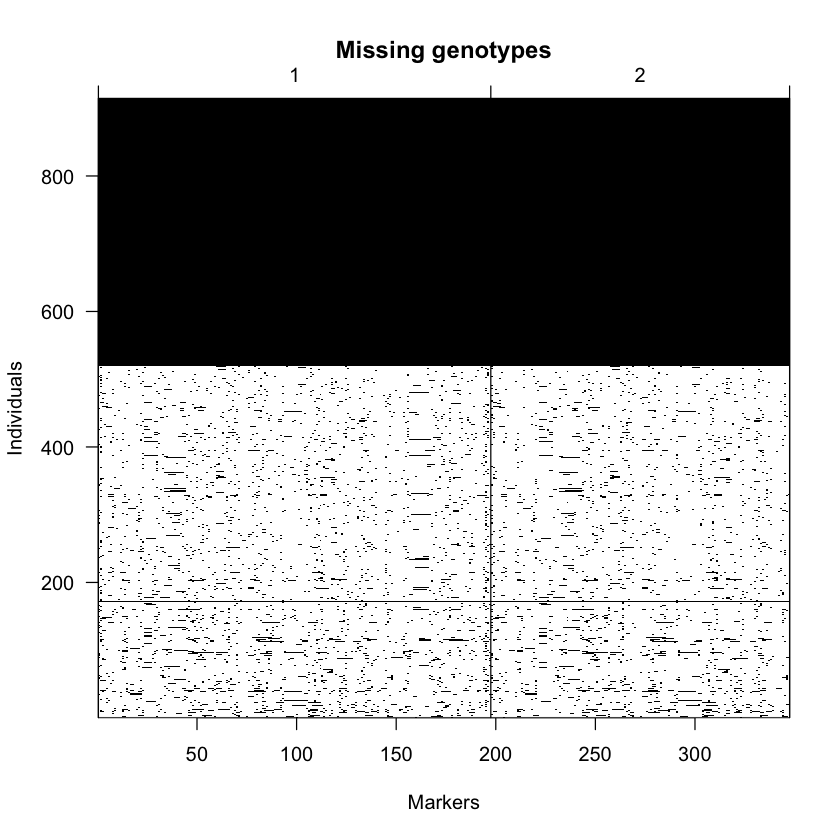

In [13]:
plotMissing(datf2)

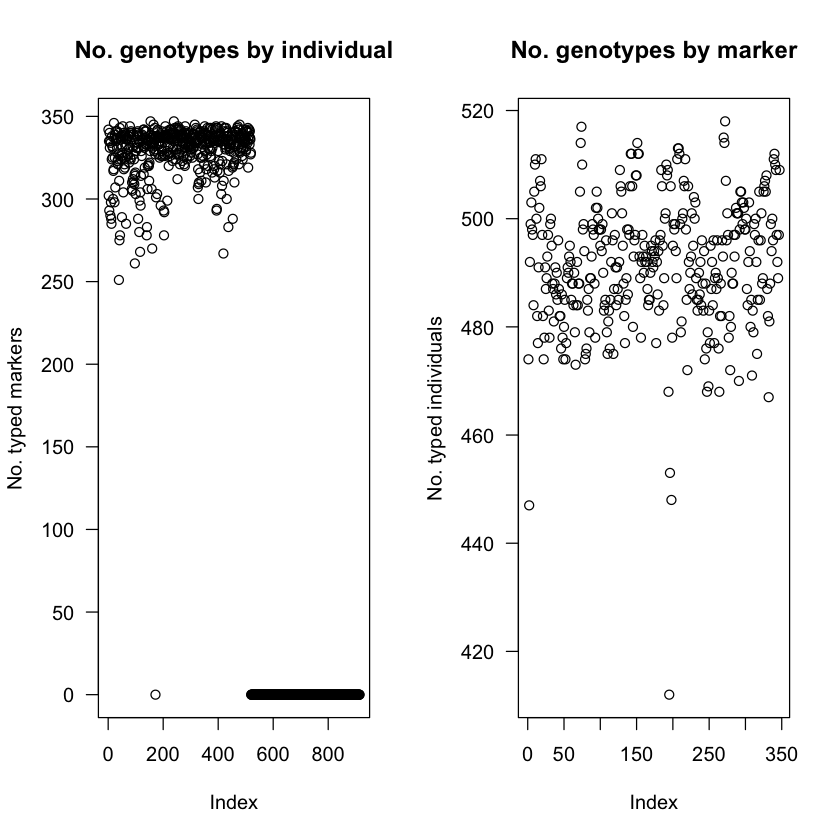

In [14]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [15]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 450]) # less than 50% of all markers


In [16]:
todrop

[1] "1-2"   "1-196" "2-1"

In [17]:
datf2.1 <- drop.markers(datf2, todrop)

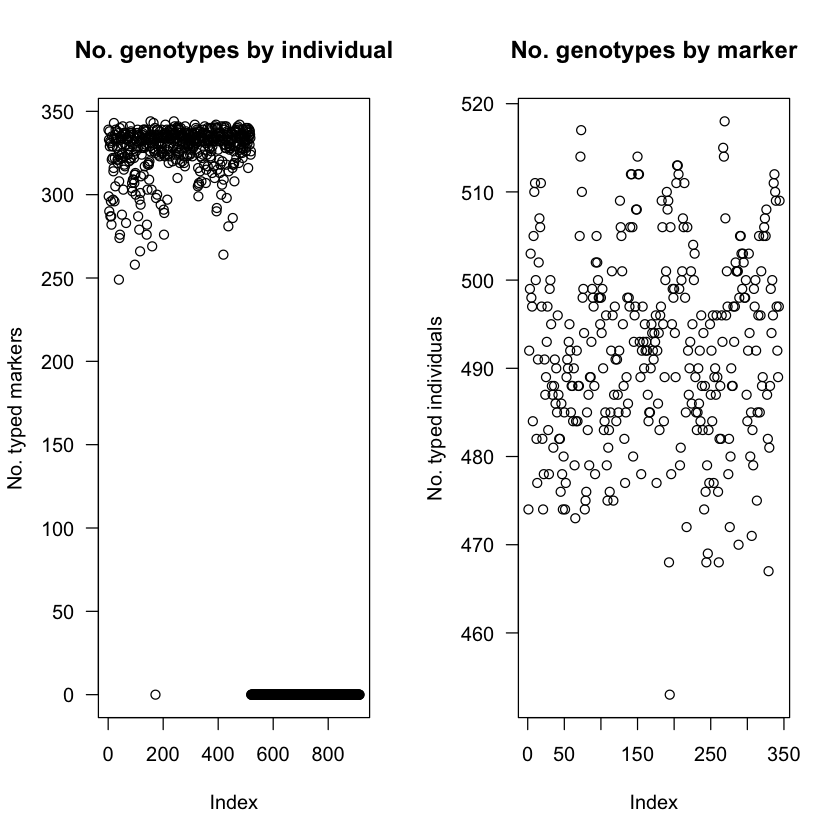

In [18]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [19]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>100)) # removing all individuals that have less than 10% of all markers


In [20]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 914

[1] 518

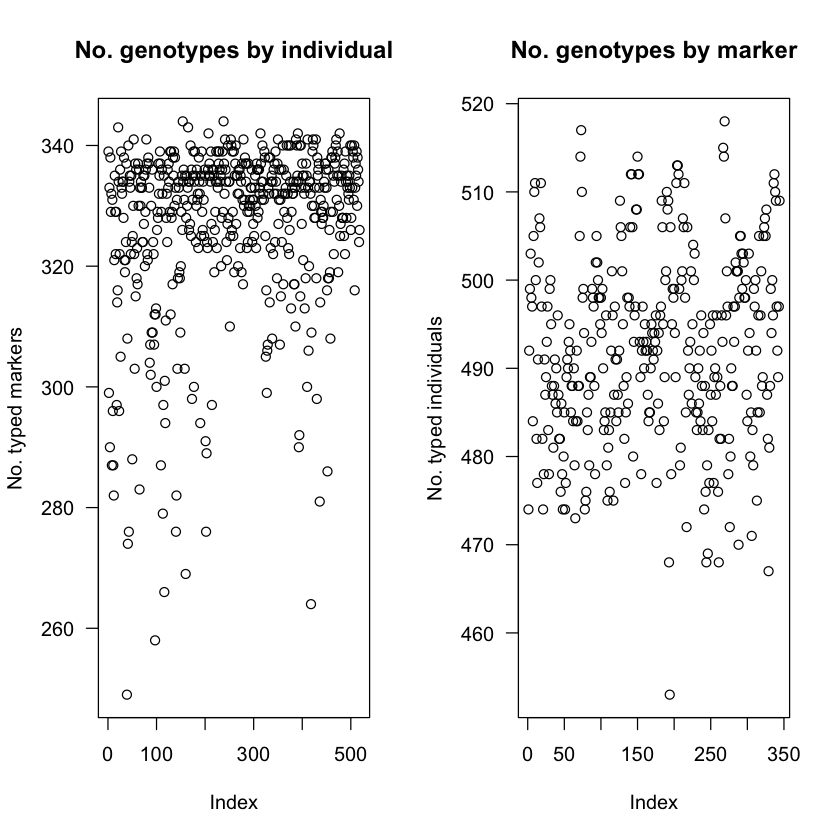

In [21]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [22]:
summary(datf2.2)

    F2 intercross

    No. individuals:    518 

    No. phenotypes:     7 
    Percent phenotyped: 100 95.8 95.8 100 100 100 100 

    No. chromosomes:    2 
        Autosomes:      1 2 

    Total markers:      344 
    No. markers:        195 149 
    Percent genotyped:  95 
    Genotypes (%):      AA:25.9  AB:49.7  BB:24.4  not BB:0.0  not AA:0.0 

In [23]:
cg <- comparegeno(datf2.2)

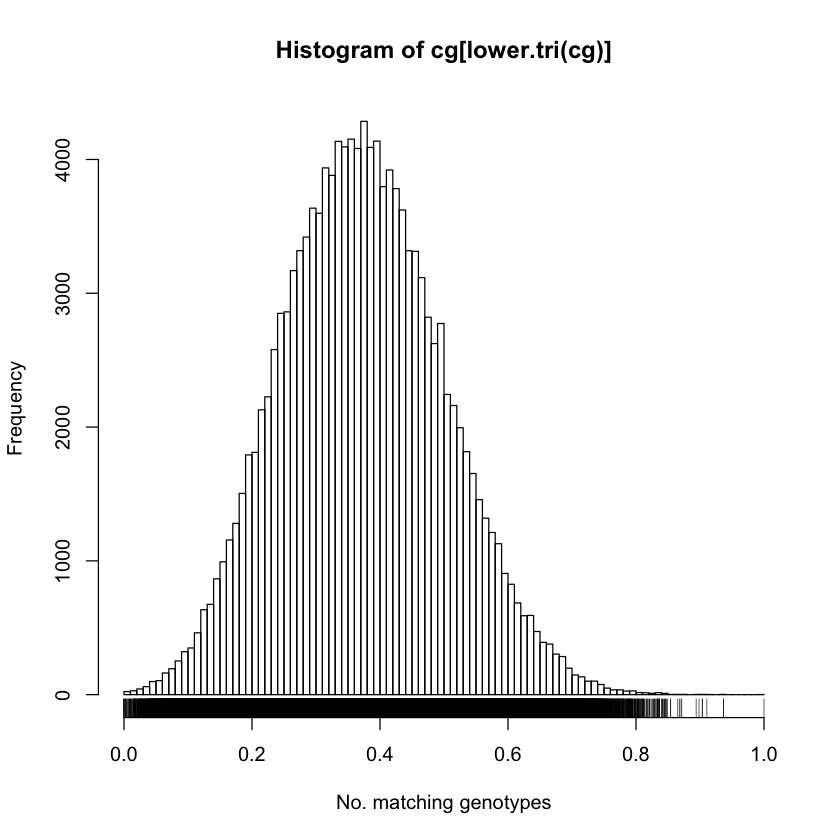

In [24]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [25]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [26]:
wh

row,col
139,154
139,238
154,238
362,366
154,391
238,391


In [27]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`2-6`
[1] "1-6"

$`1-20`
[1] "1-19" "2-19" "2-20"

$`2-22`
[1] "1-22"

$`2-27`
[1] "1-26" "1-27" "2-26"

$`2-35`
[1] "1-35"

$`2-41`
[1] "1-41"

$`2-44`
[1] "1-44"

$`2-45`
[1] "1-45"

$`2-59`
[1] "1-59"

$`2-61`
[1] "1-61"

$`2-72`
[1] "1-72"

$`2-75`
[1] "1-75" "2-76"

$`2-78`
[1] "1-78"

$`2-80`
[1] "1-80"

$`2-81`
[1] "1-81"

$`2-85`
[1] "1-85"

$`2-86`
[1] "1-86"

$`2-97`
[1] "1-97"

$`2-98`
[1] "1-98"

$`2-99`
[1] "1-99"

$`2-100`
[1] "1-100"

$`2-101`
[1] "1-101"

$`2-108`
[1] "1-108"

$`2-111`
[1] "1-111"

$`2-125`
[1] "1-125"

$`2-130`
[1] "1-130"

$`2-131`
[1] "1-131"

$`2-140`
[1] "1-140"

$`1-5`
[1] "2-5"

$`1-7`
[1] "2-7"

$`2-10`
[1] "2-11" "2-12"

$`1-17`
[1] "2-17"

$`1-18`
[1] "2-18"

$`1-28`
[1] "2-28"

$`1-33`
[1] "2-33"

$`1-36`
[1] "2-36"

$`1-38`
[1] "2-38"

$`1-39`
[1] "2-39"

$`1-51`
[1] "2-51"

$`1-56`
[1] "2-56"

$`1-63`
[1] "2-63"

$`1-70`
[1] "2-70"

$`1-82`
[1] "2-82"

$`1-94`
[1] "2-94"

$`1-95`
[1] "2-95"

$`1-96`
[1] "2-96"

$`1-102`
[1] "2-102"

$`1-10

In [28]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“Sex column should be coded as 0=female 1=male; sex ignored.”

In [29]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

chr,missing,AA,AB,BB,not.BB,not.AA,P.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [30]:
length(todrop)

[1] 0

In [31]:
datf2.3 <- datf2.2

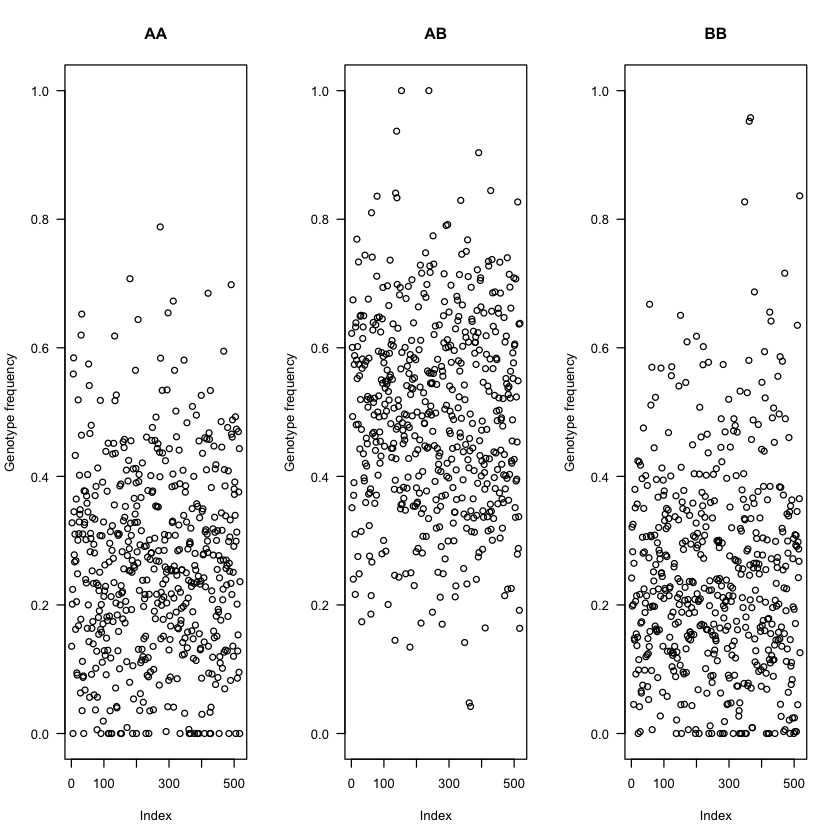

In [32]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

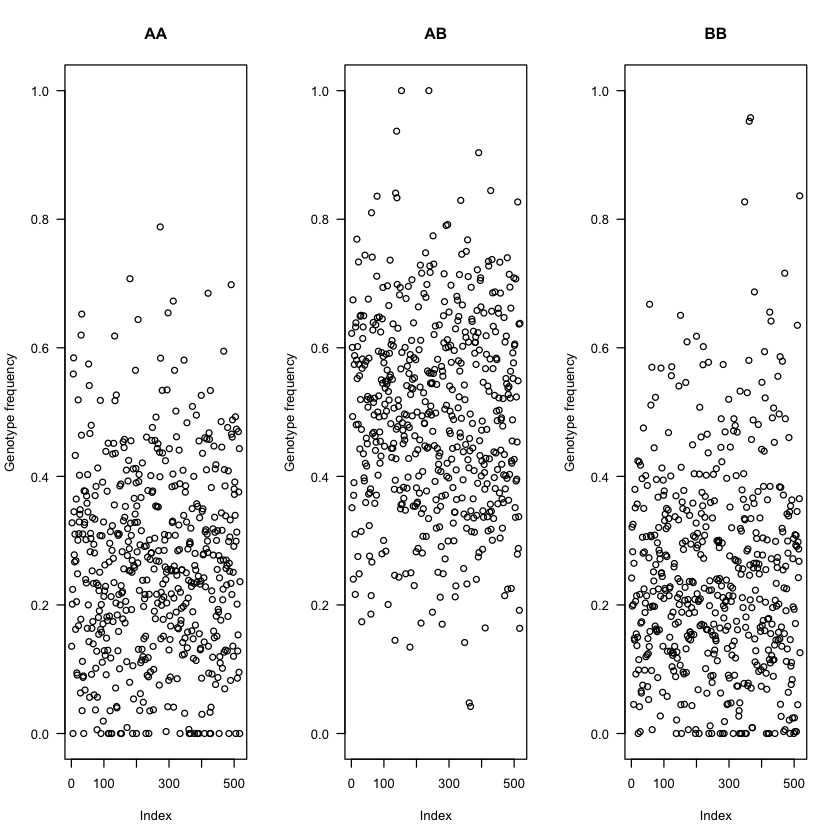

In [33]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [34]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [35]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [36]:
datf2.4 <- datf2.3

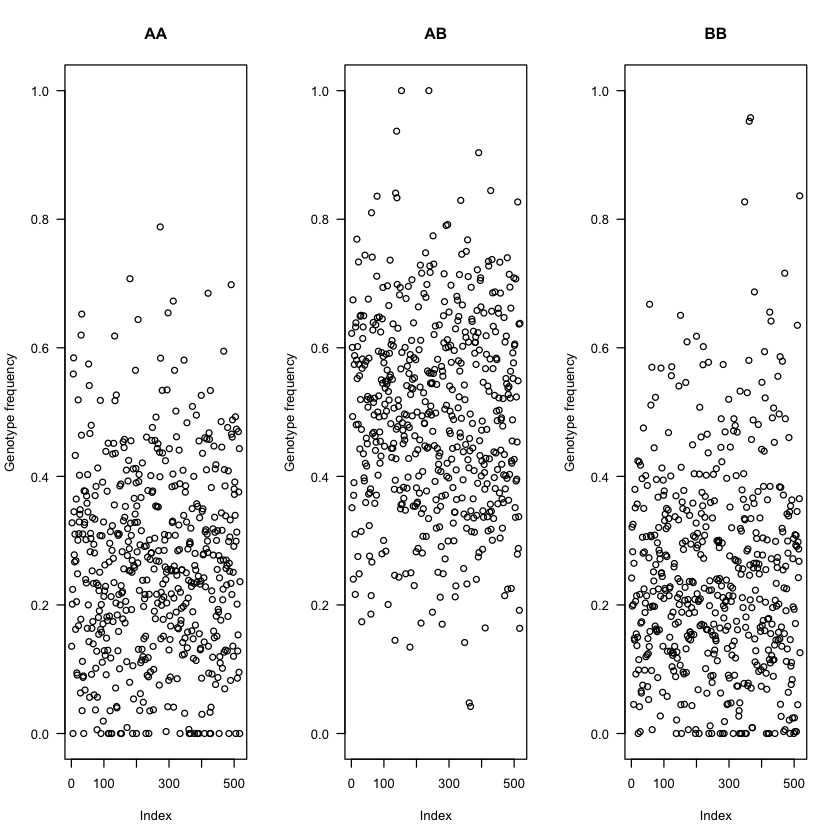

In [37]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [38]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

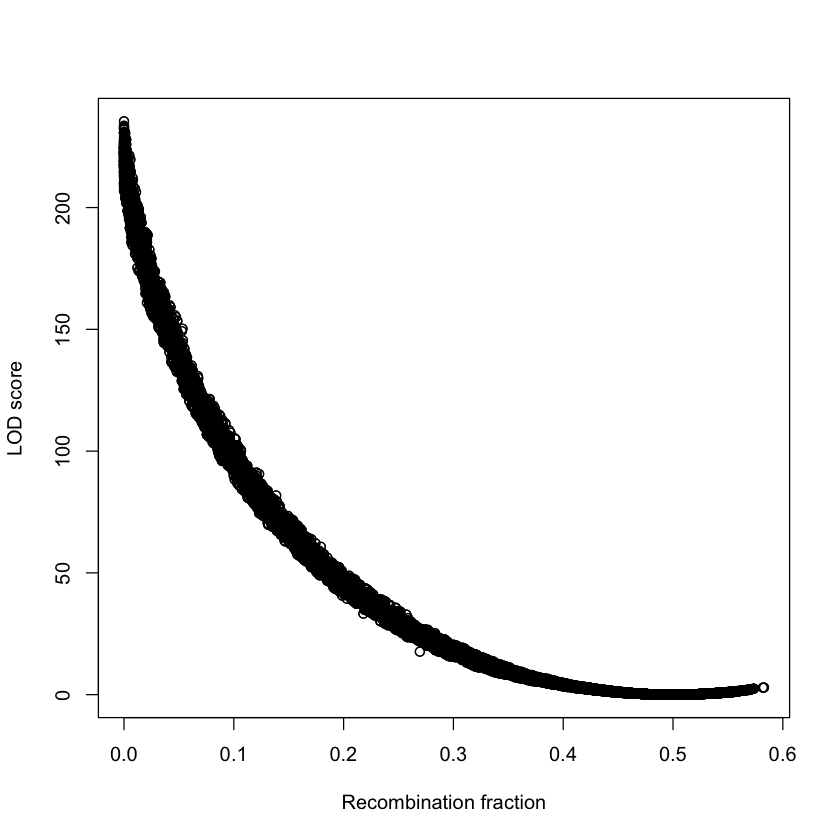

In [39]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

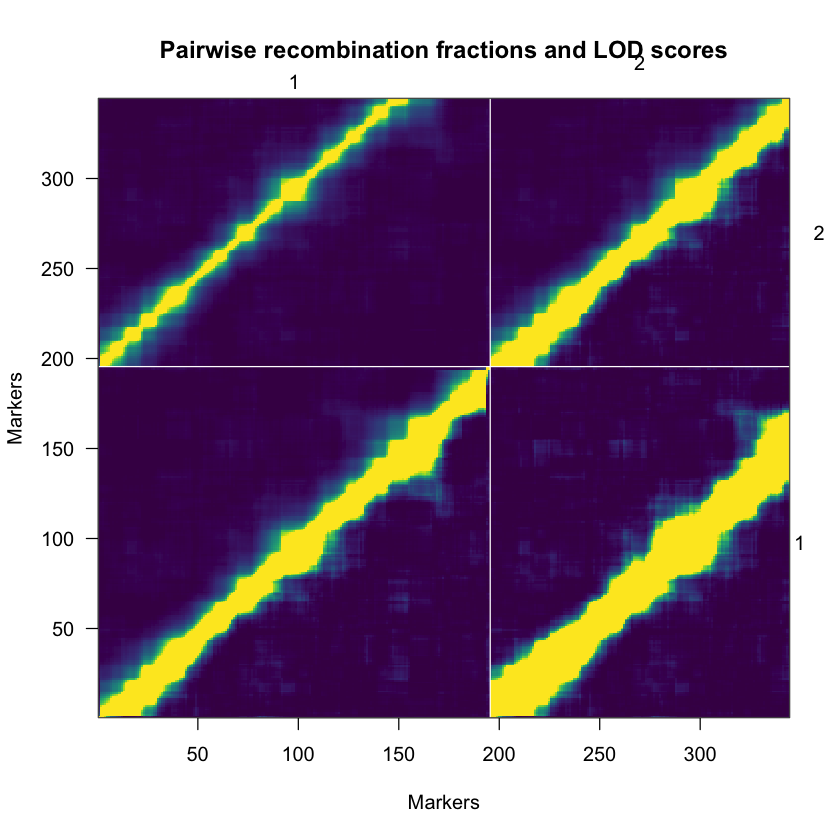

In [40]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [41]:
genmap <- est.map(datf2.4, error.prob=0.005)

In [42]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
,<dbl>,<dbl>,<dbl>,<dbl>
1,195,587.7992,3.029893,57.78586
2,149,392.7402,2.653650,11.62727
overall,344,980.5393,2.867074,57.78586


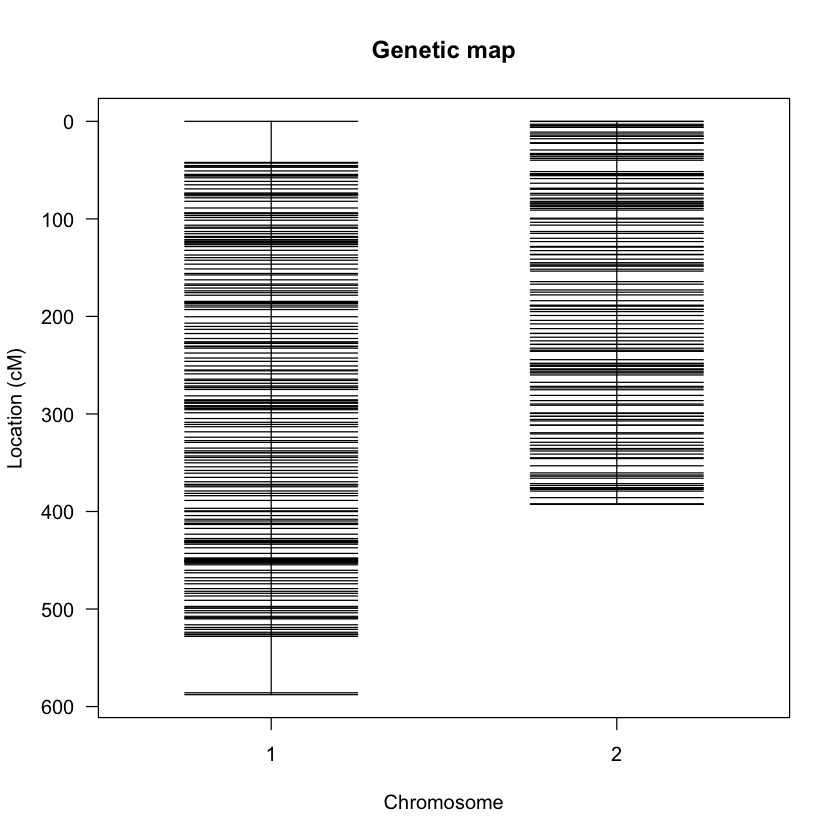

In [43]:
plotMap(genmap)

In [59]:
genmap

$`1`
      1-1       1-3       1-4       1-5       1-6       1-7       1-8       1-9 
  0.00000  42.10535  42.87032  45.36197  46.61169  47.05604  50.84448  54.35152 
     1-10      1-12      1-13      1-14      1-15      1-16      1-17      1-18 
 55.54516  56.09888  57.91567  61.53259  65.06497  69.22781  73.46118  74.69112 
     1-19      1-20      1-21      1-22      1-23      1-24      1-25      1-26 
 74.69112  74.69112  76.32559  78.46092  81.96346  88.83209  93.91995  94.30679 
     1-27      1-28      1-29      1-30      1-31      1-32      1-33      1-34 
 94.30679  94.68093  96.49242  98.55502 101.35137 106.48426 108.53879 109.58397 
     1-35      1-36      1-37      1-38      1-39      1-40      1-41      1-42 
112.95281 115.22773 117.98742 118.97113 121.17906 122.55061 123.21407 124.40252 
     1-43      1-44      1-45      1-46      1-47      1-48      1-49      1-50 
125.60144 126.45881 128.38023 132.21055 137.06018 139.76225 142.39871 146.42206 
     1-51      1-52    

In [44]:
datf2.4 <- replace.map(datf2.4, genmap)

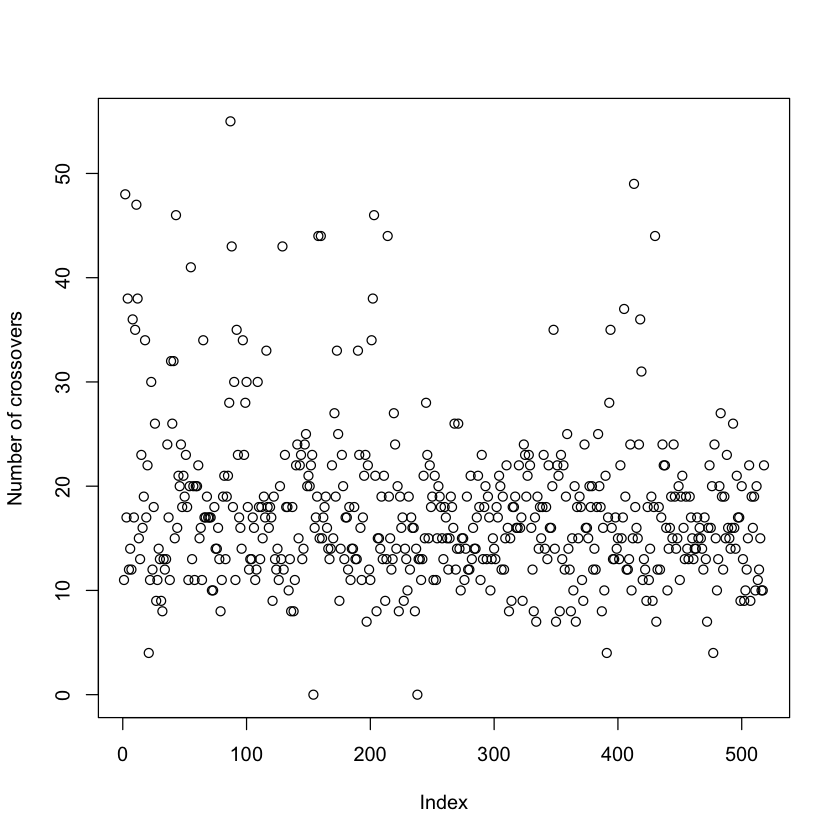

[1] 17.56564

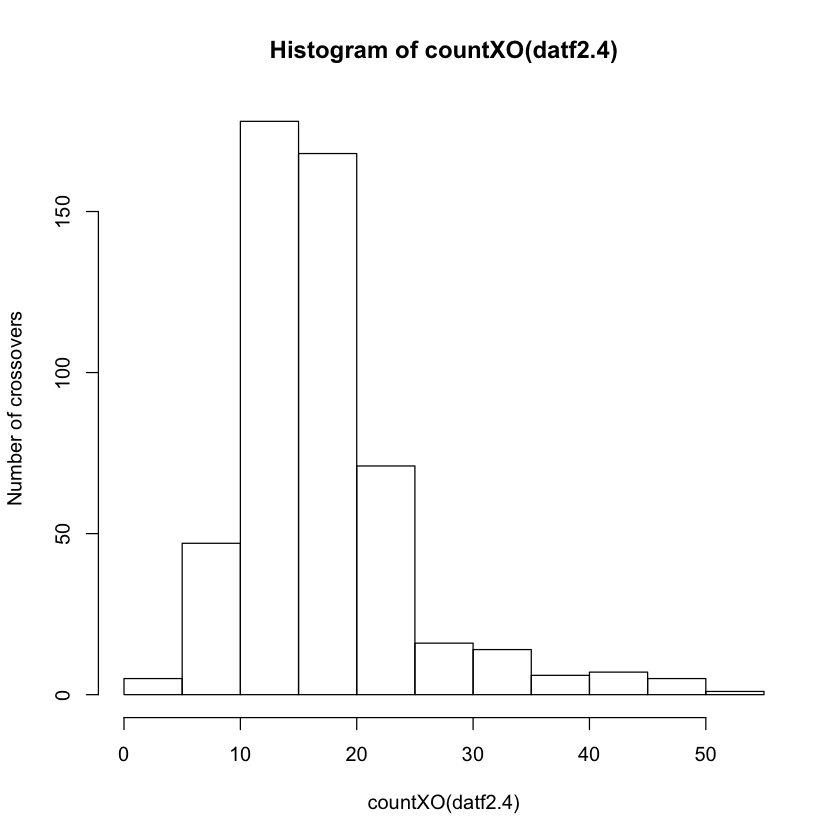

In [45]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [46]:
datf2.5 <- datf2.4

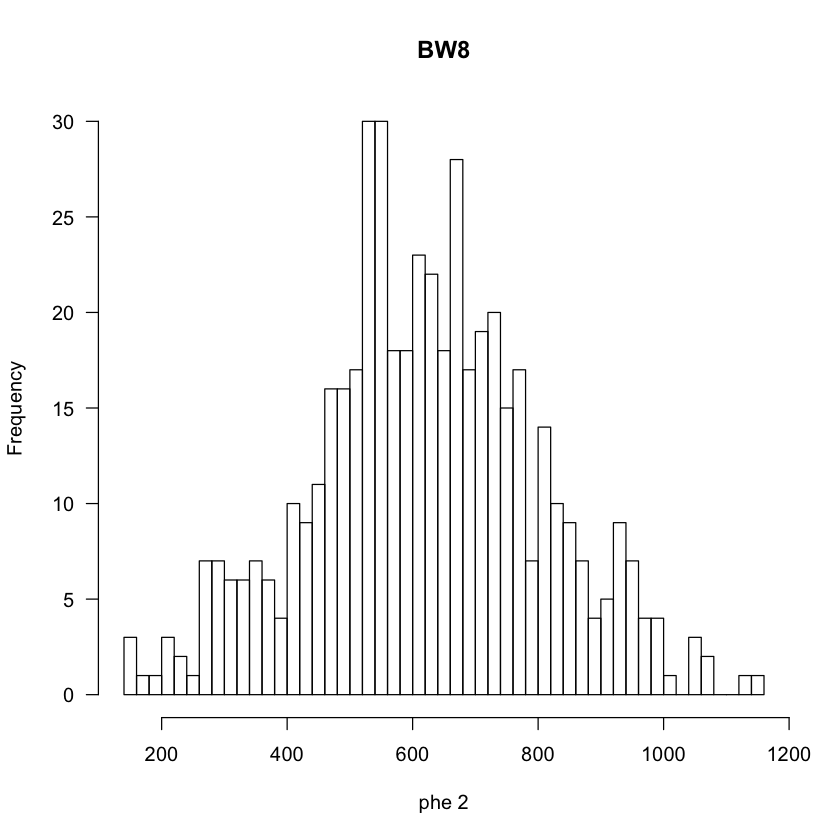

In [47]:
plotPheno(datf2.5, pheno.col =2 )

In [48]:
#plotMissing(datf2.5, reorder=TRUE)

In [49]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [50]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [51]:
out.em <- scanone(datf2.5, pheno.col = 2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 22 individuals with missing phenotypes.
”

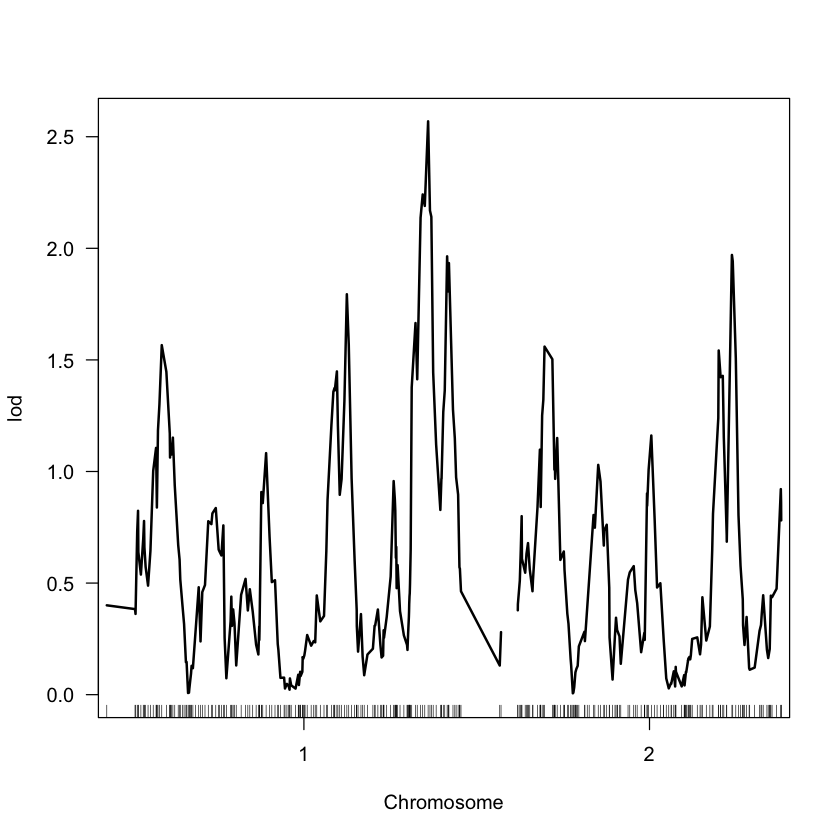

In [52]:
plot(out.em)

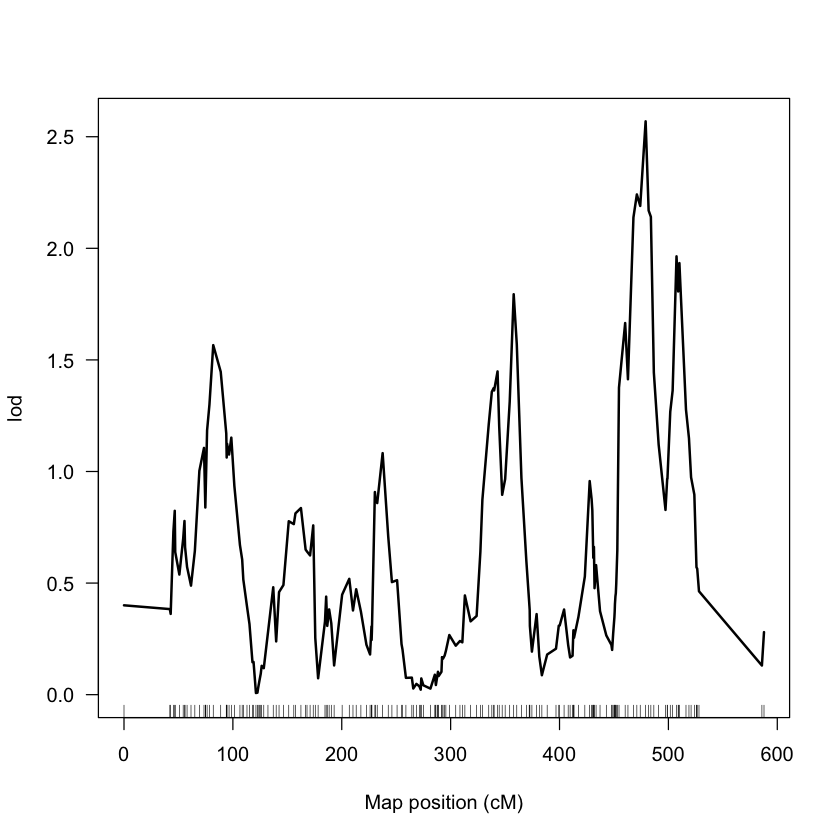

In [53]:
plot(out.em,chr=1)

In [54]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [55]:
ac2 <- pull.pheno(datf2.5, c("SEX","DAM","SIRE"))

In [56]:
out.acovar <- scanone(datf2.5, pheno.col = 2, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 22 individuals with missing phenotypes.
”

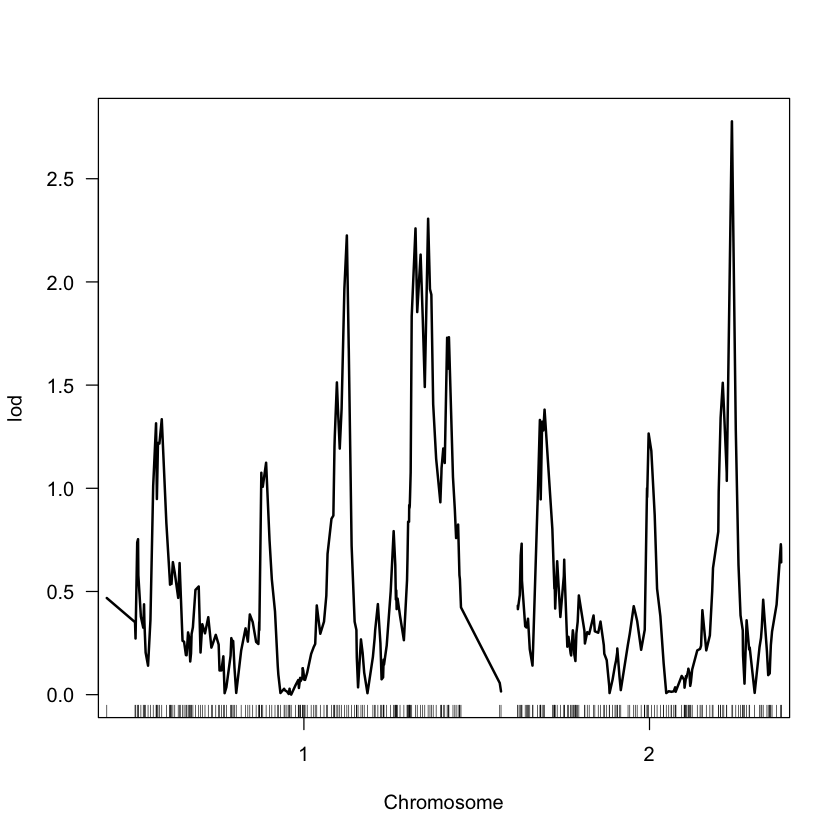

In [57]:
plot(out.acovar, )

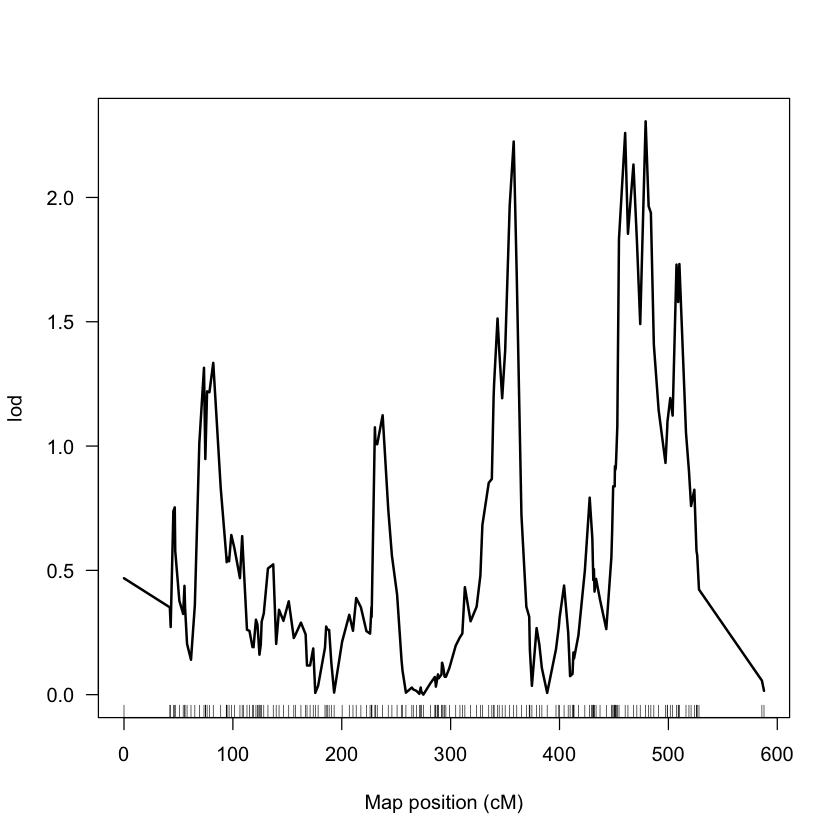

In [58]:
plot(out.acovar, chr=1)

In [ ]:
out.acovar

In [100]:
#write.csv(out.acovar, "20190828_out_f2_bw8_ctrlsex.csv")